In [4]:
import tensorflow as tf
import scipy.stats as st
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import IntSlider
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os

# Cerebros líquidos, CFD, LCA notebook.
## Preparación de terreno

In [89]:
#From https://stackoverflow.com/users/4527807/teddy-hartanto answer
from scipy import signal

def gkern(kernlen=21, std1=3,std2=3):
    """Returns a 2D Gaussian kernel array."""
    gkern1d1= signal.gaussian(kernlen, std=std1).reshape(kernlen, 1)
    gkern1d2= signal.gaussian(kernlen, std=std2).reshape(kernlen, 1)


    #print(gkern1d)
    gkern2d = np.outer(gkern1d1, gkern1d2)
    return gkern2d

In [96]:
def f(res,std1,std2):
    life_map=np.zeros((res+20,res+20))
    slicer=(slice(20,20+res,1),slice(20,20+res,1))
    life_map[slicer]=gkern(res,std1,std2)
    sns.heatmap(life_map,cmap='inferno',cbar=True)
    return (res,std1,std2)
w=interact(f, res=IntSlider(min=1, max=30, step=1, value=10,continuous_update=False),std1=IntSlider(min=1, max=30, step=1, value=3,continuous_update=False),std2=IntSlider(min=1, max=30, step=1, value=3,continuous_update=False));

interactive(children=(IntSlider(value=10, continuous_update=False, description='res', max=30, min=1), IntSlide…

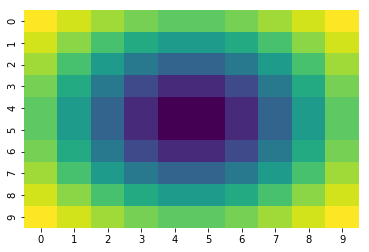

In [91]:
(res,std1,std2)=w.widget.result
#life_map=np.zeros((res+20,res+20))
#slicer=(slice(20,20+res,1),slice(20,20+res,1))
#life_map[slicer]=-gkern(res,std1,std2)
life_map=-gkern(res,std1,std2)

sns.heatmap(life_map,cmap='viridis',cbar=False)

## Listado de agentes
Cada tupla de la lista es la posición de un agente.

In [14]:
agents=[(26,1),(2,28),(1,1)]
images=[]


### Generar un paso de la simulación

In [2]:
render=np.copy(life_map)
for ida,agent in enumerate(agents):
    print (ida)
    
    render[agent]=np.nan
    kernel=(slice(agent[0]-1,agent[0]+2,1),slice(agent[1]-1,agent[1]+2,1))
    idx=np.argmin(life_map[kernel])
    (i,j)=np.unravel_index(idx, (3,3))
    agents[ida]=(agent[0]+i-1,agent[1]+j-1)
    if (i==1 and j==1):
        agents.remove(agent)
        life_map[agent]=np.nan
fig, ax = plt.subplots()
sns.heatmap(render,cmap='viridis',cbar=False,axes=ax)


NameError: name 'np' is not defined

### Mostrar el mapa

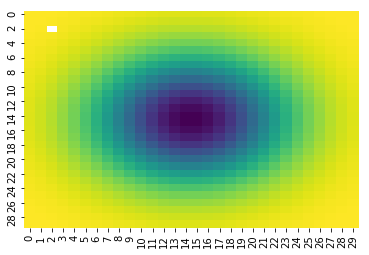

In [417]:
fig, ax = plt.subplots()
sns.heatmap(render,cmap='viridis',cbar=False,axes=ax)

# Experimento 1: **Generar simulación**
### Explicar la forma del terreno:

In [93]:
agents=[(4,i+4) for i in range(90)]
for i in range(10):
    for j in range(10):
        agents.append((80+i,80+j))
print(agents)

[(4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (4, 20), (4, 21), (4, 22), (4, 23), (4, 24), (4, 25), (4, 26), (4, 27), (4, 28), (4, 29), (4, 30), (4, 31), (4, 32), (4, 33), (4, 34), (4, 35), (4, 36), (4, 37), (4, 38), (4, 39), (4, 40), (4, 41), (4, 42), (4, 43), (4, 44), (4, 45), (4, 46), (4, 47), (4, 48), (4, 49), (4, 50), (4, 51), (4, 52), (4, 53), (4, 54), (4, 55), (4, 56), (4, 57), (4, 58), (4, 59), (4, 60), (4, 61), (4, 62), (4, 63), (4, 64), (4, 65), (4, 66), (4, 67), (4, 68), (4, 69), (4, 70), (4, 71), (4, 72), (4, 73), (4, 74), (4, 75), (4, 76), (4, 77), (4, 78), (4, 79), (4, 80), (4, 81), (4, 82), (4, 83), (4, 84), (4, 85), (4, 86), (4, 87), (4, 88), (4, 89), (4, 90), (4, 91), (4, 92), (4, 93), (80, 80), (80, 81), (80, 82), (80, 83), (80, 84), (80, 85), (80, 86), (80, 87), (80, 88), (80, 89), (81, 80), (81, 81), (81, 82), (81, 83), (81, 84), (81, 85), (81, 86), (81, 87), (81, 88), (81, 

### Generar a los agentes

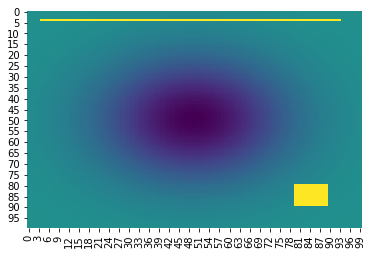

In [94]:
#agents=[(10,10)]
(res,std1,std2)=(100,20,20)
life_map=-gkern(res,std1,std2)
#agents=[(i,j)in range((100,100))]
images=[]
#os.remove('life.gif')
render=np.copy(life_map)
for agent in agents:
    render[agent]=1
fig, ax = plt.subplots()
sns.heatmap(render,cmap='viridis',cbar=False,axes=ax)


In [ ]:
### P

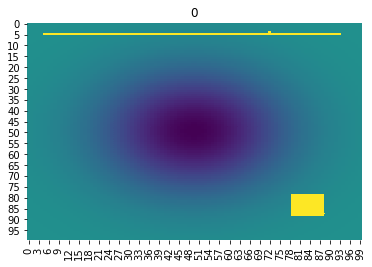

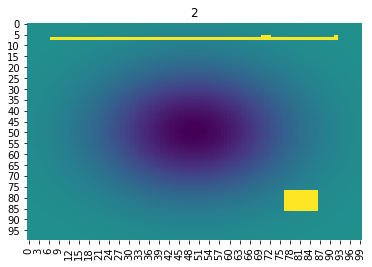

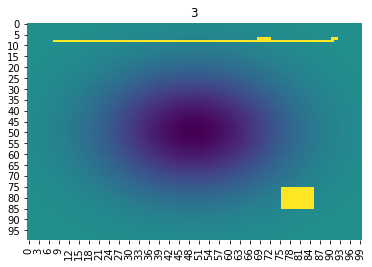

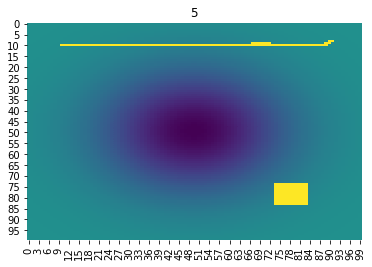

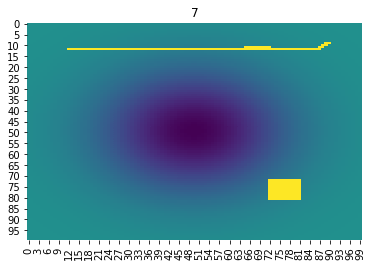

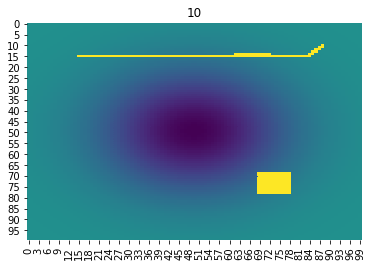

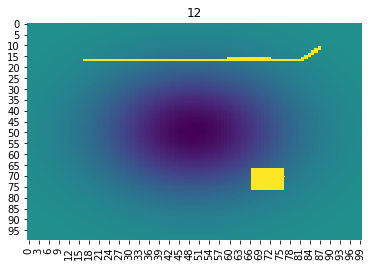

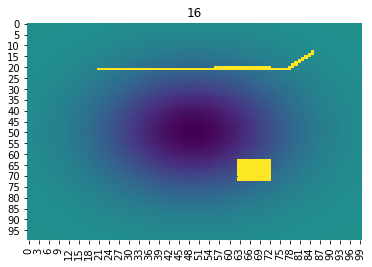

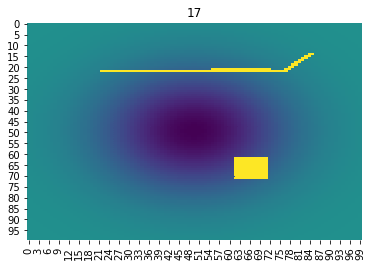

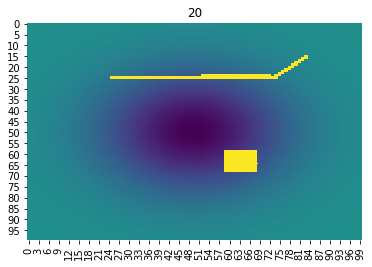

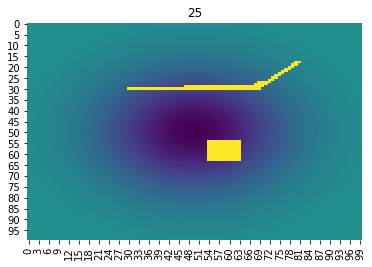

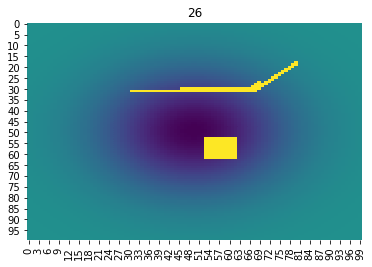

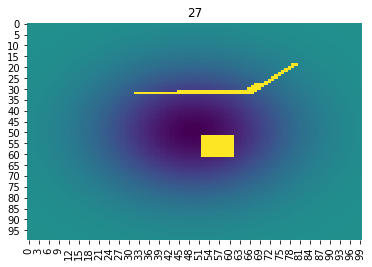

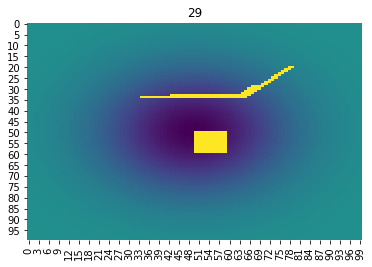

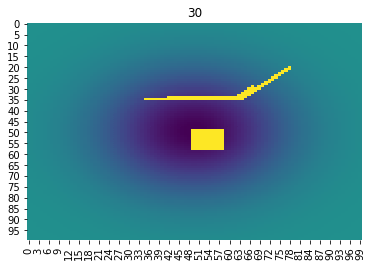

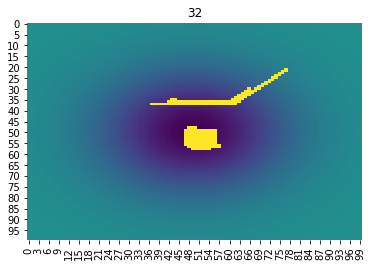

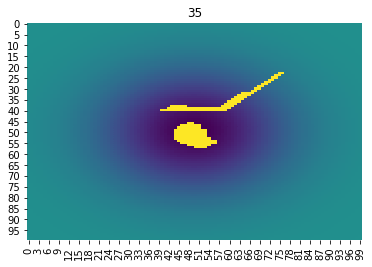

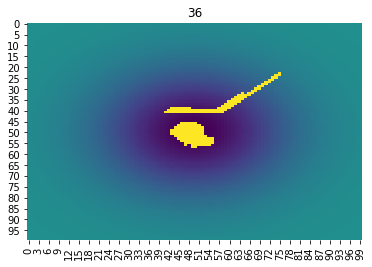

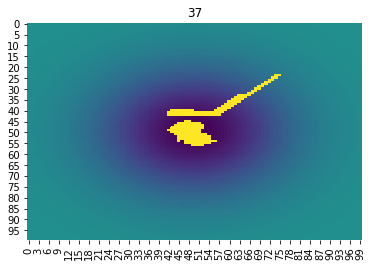

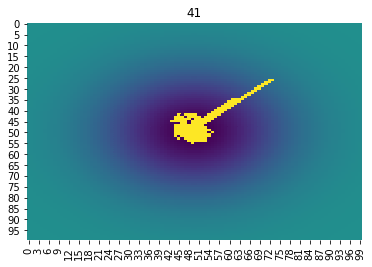

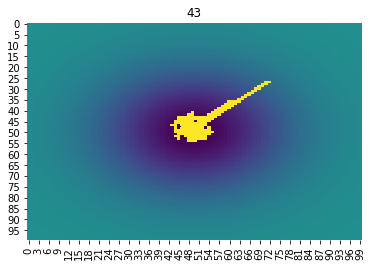

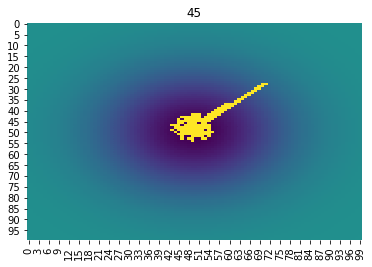

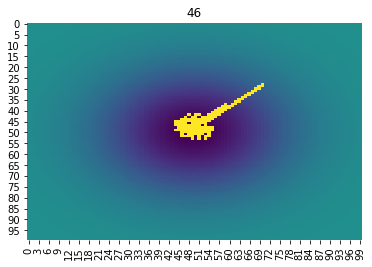

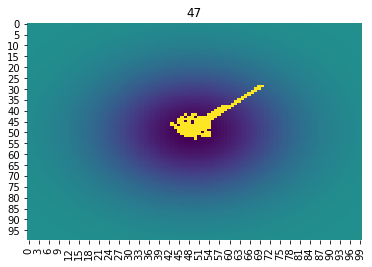

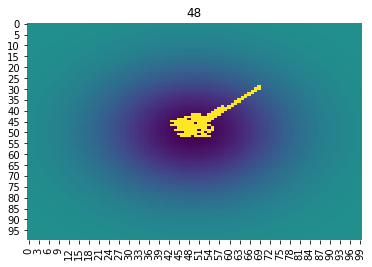

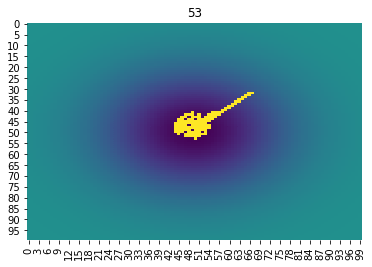

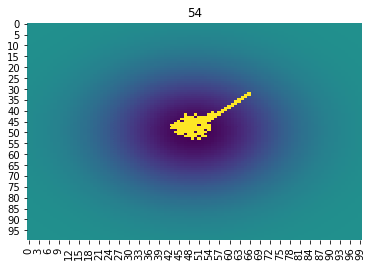

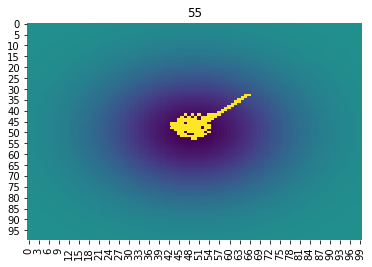

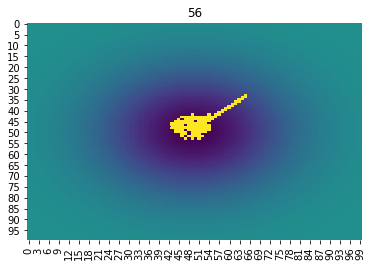

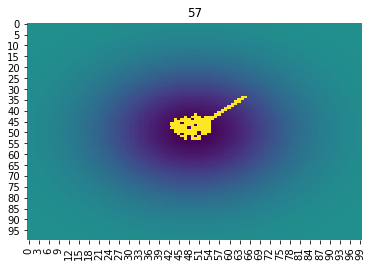

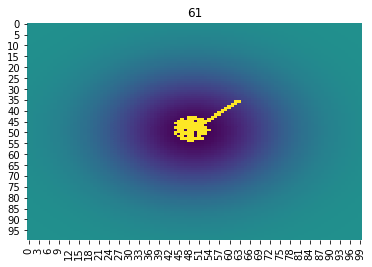

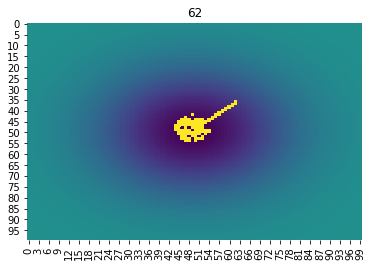

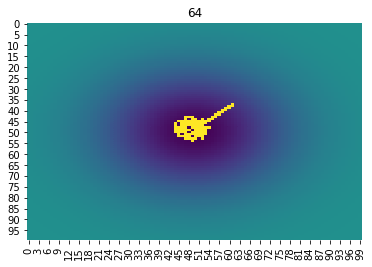

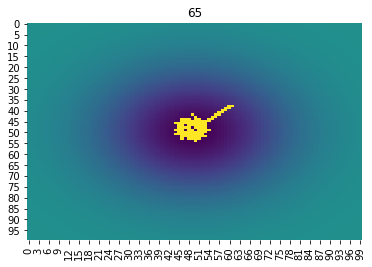

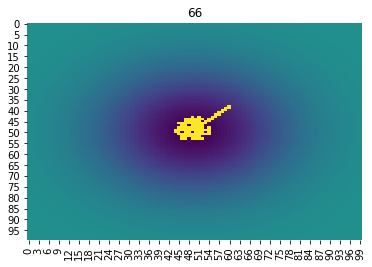

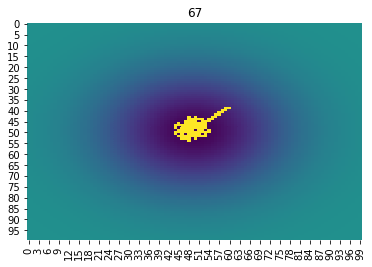

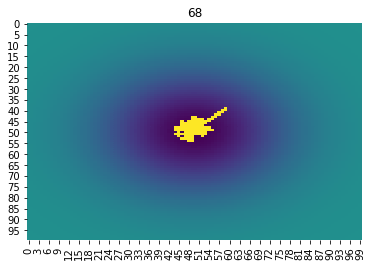

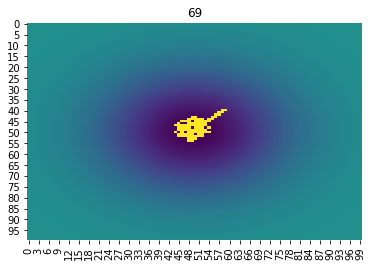

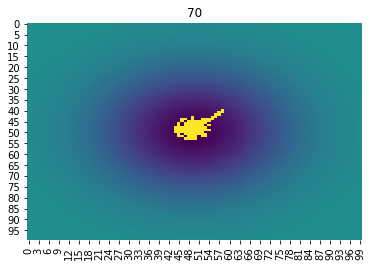

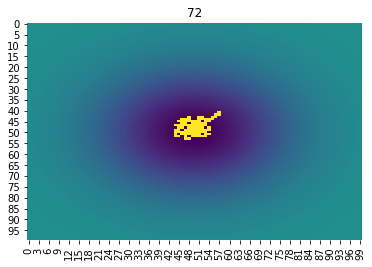

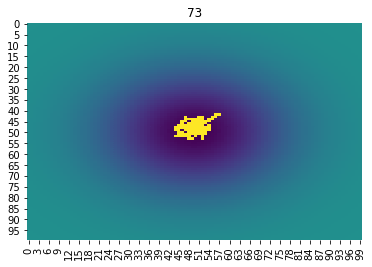

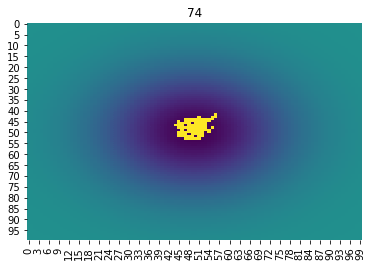

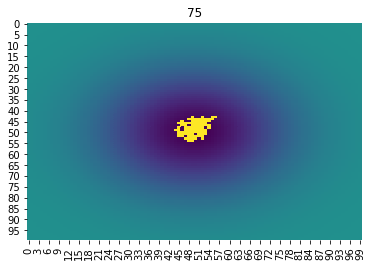

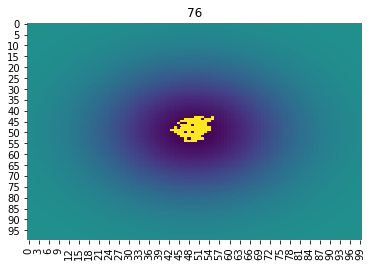

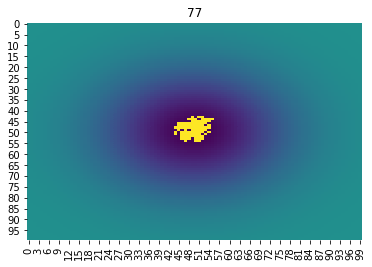

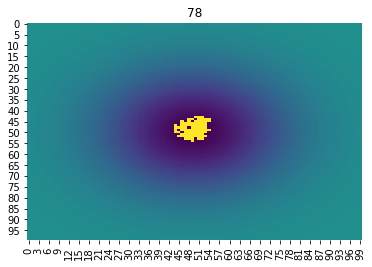

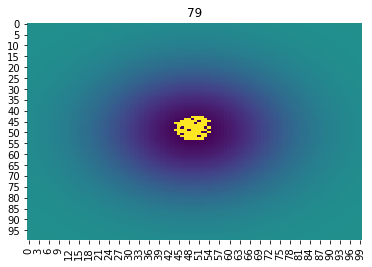

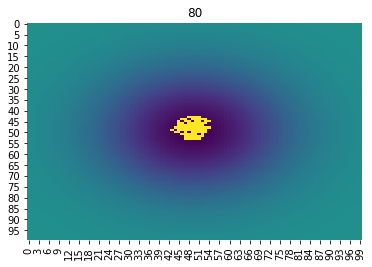

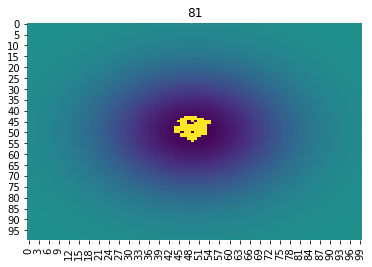

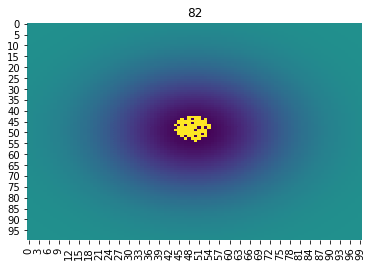

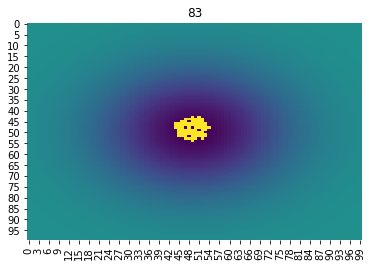

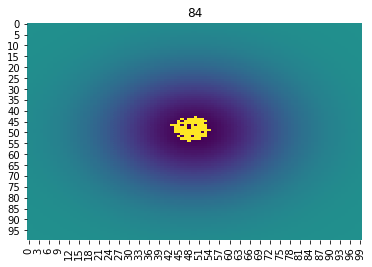

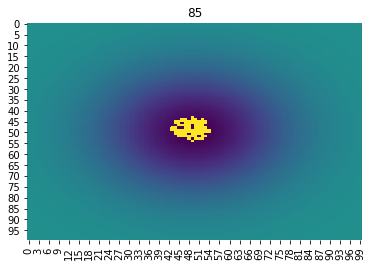

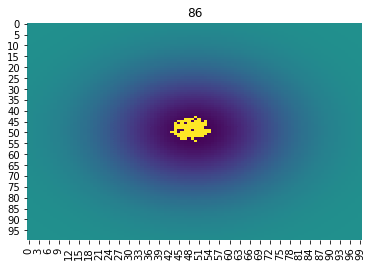

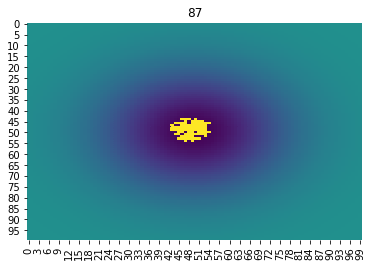

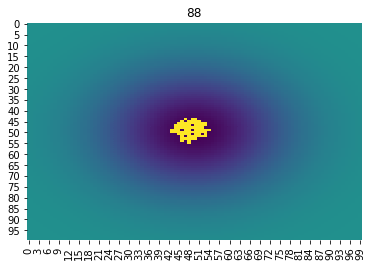

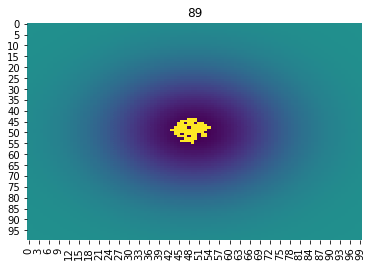

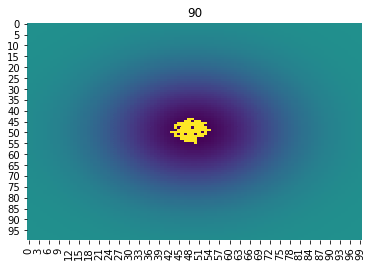

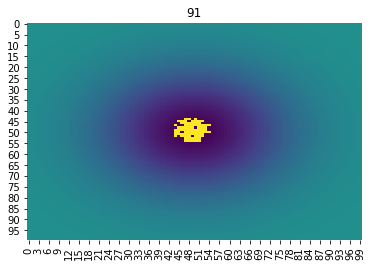

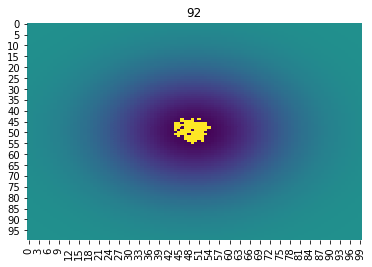

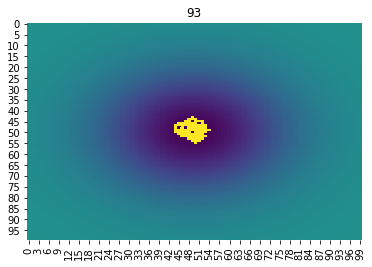

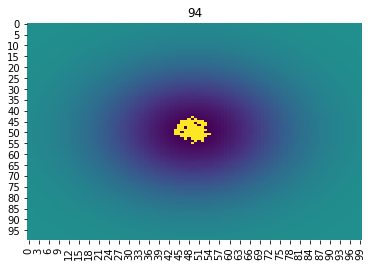

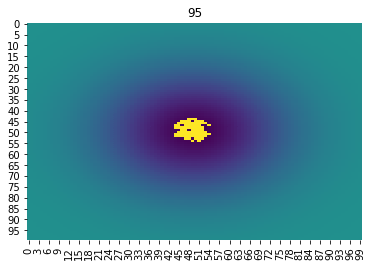

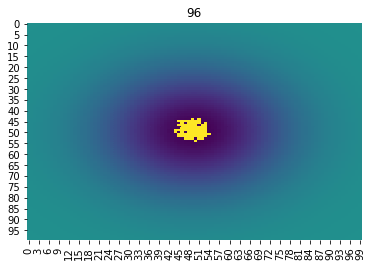

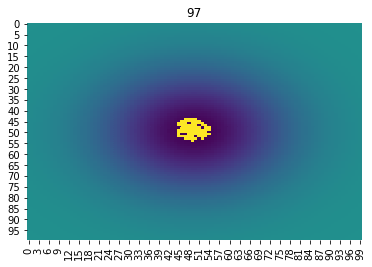

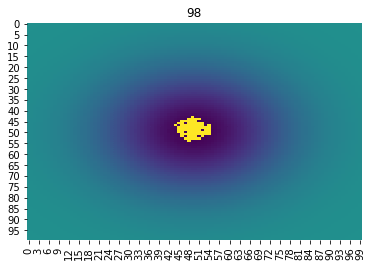

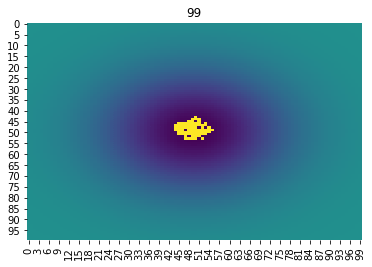

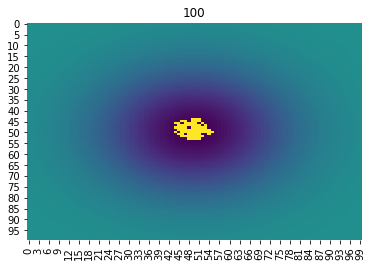

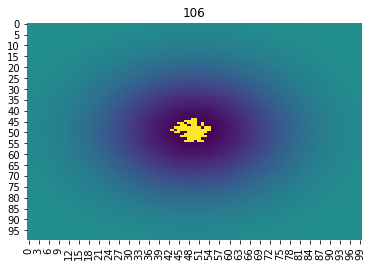

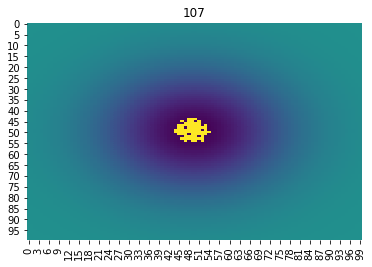

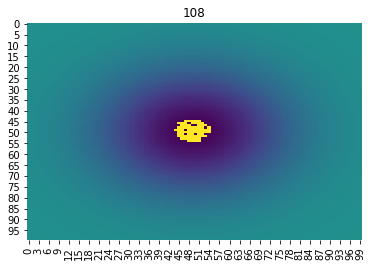

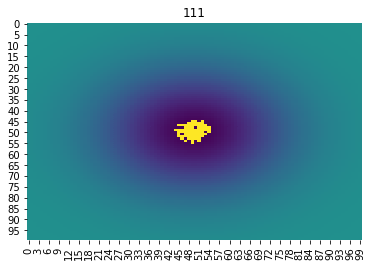

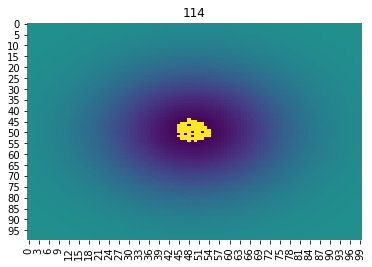

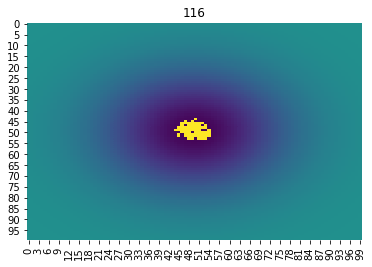

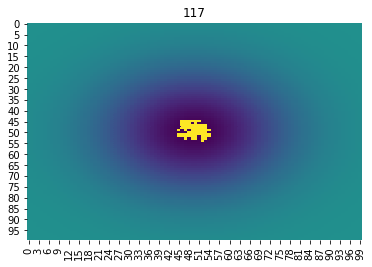

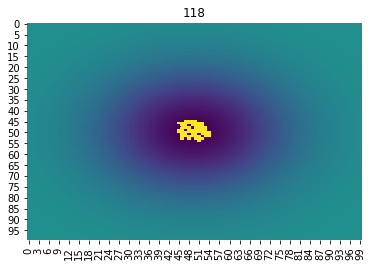

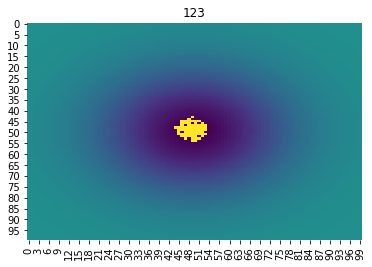

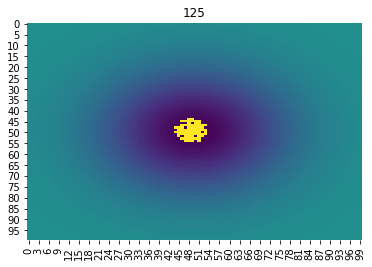

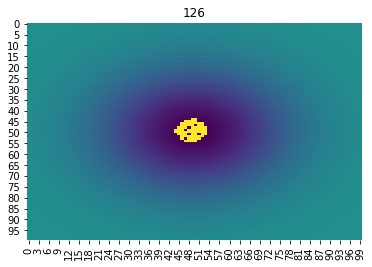

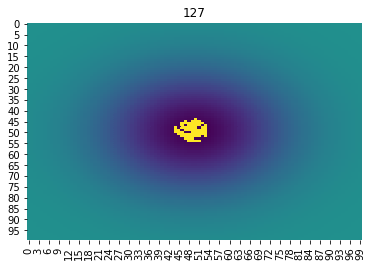

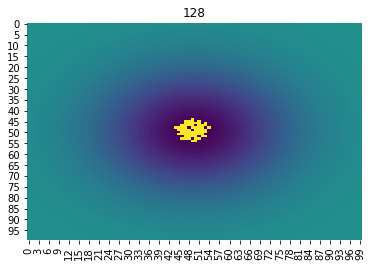

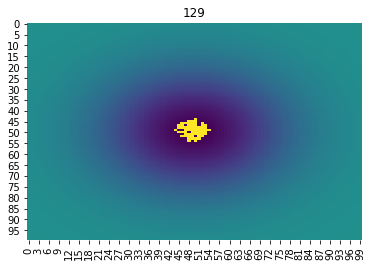

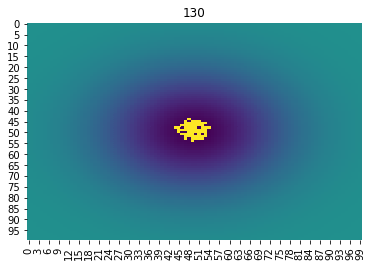

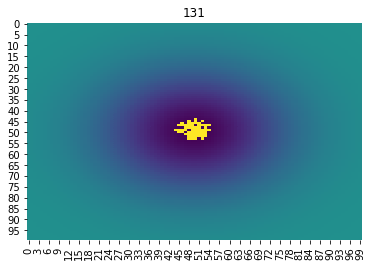

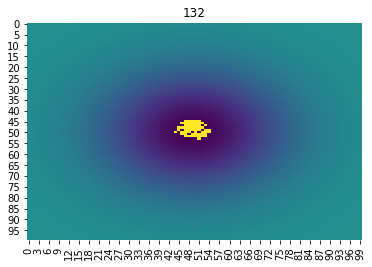

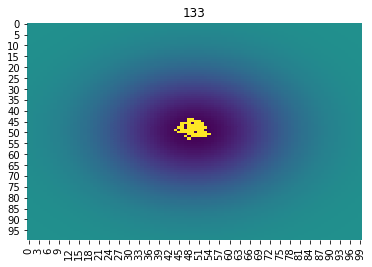

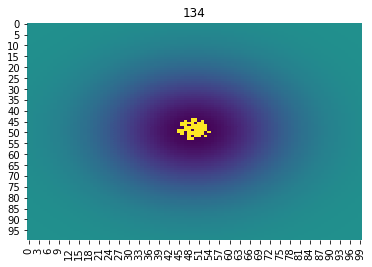

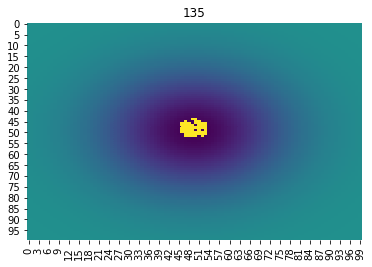

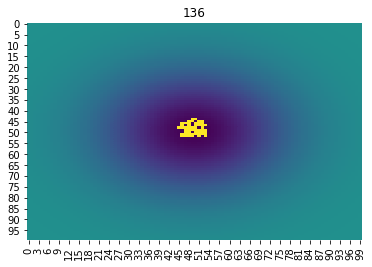

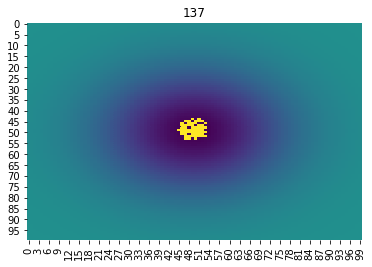

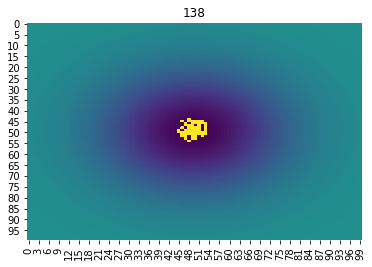

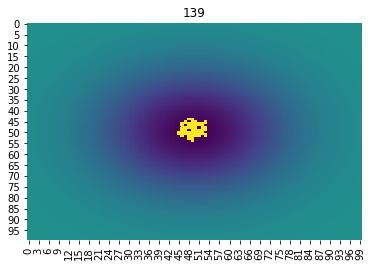

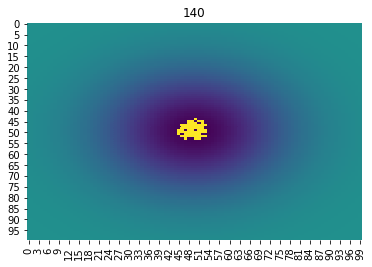

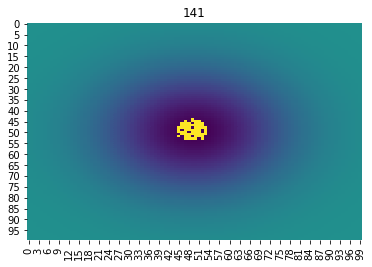

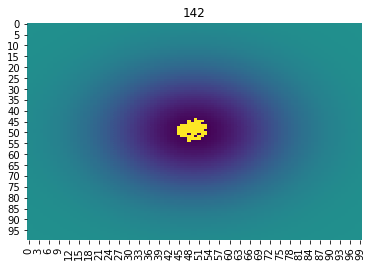

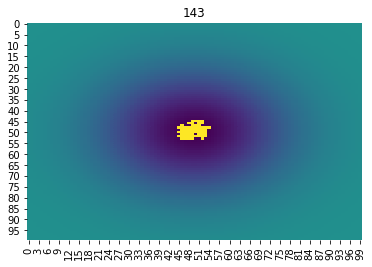

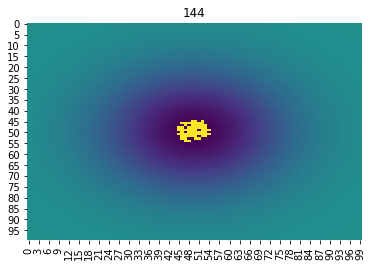

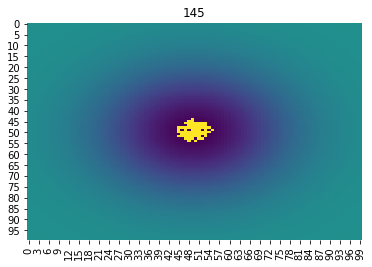

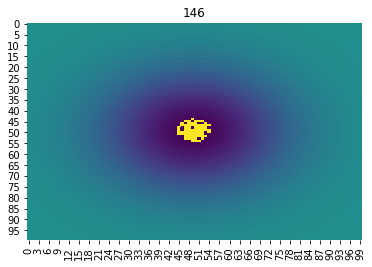

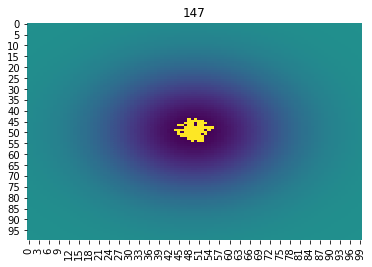

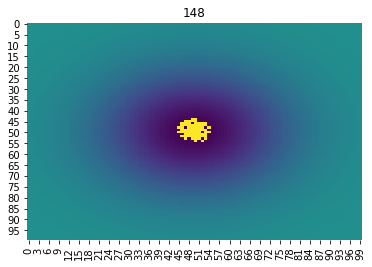

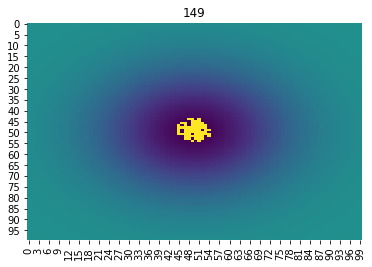

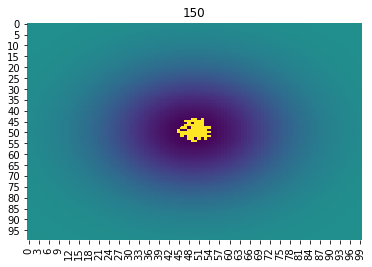

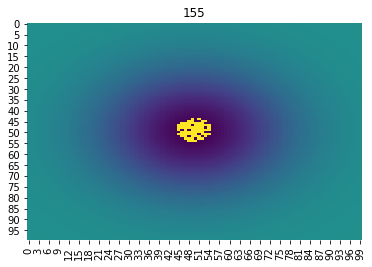

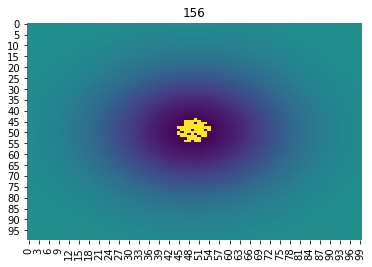

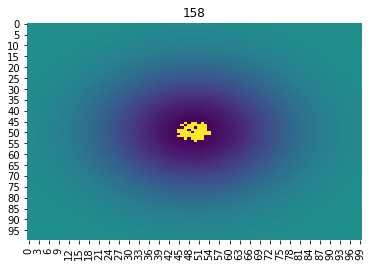

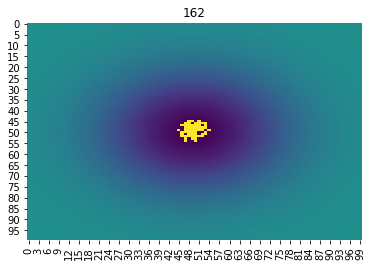

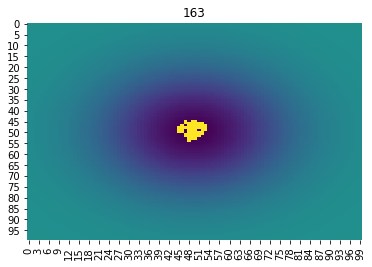

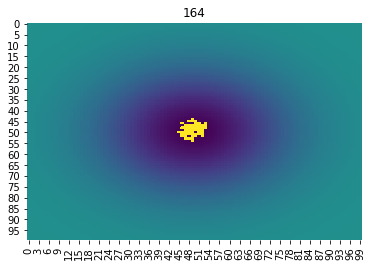

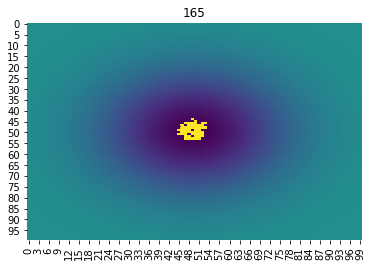

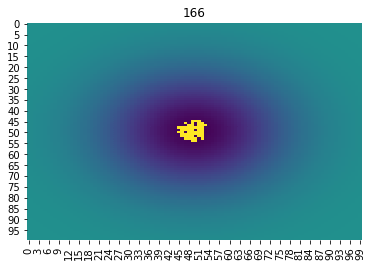

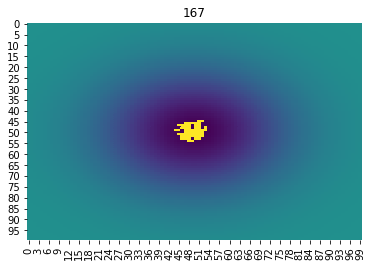

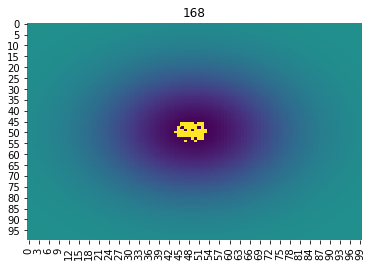

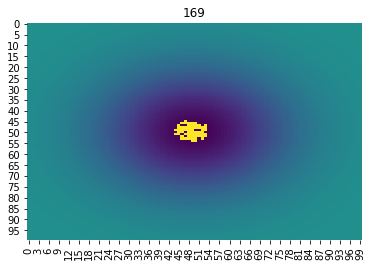

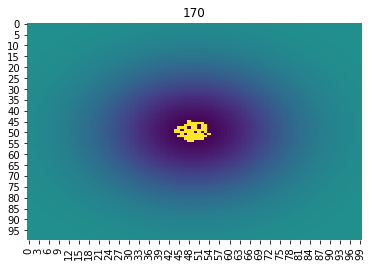

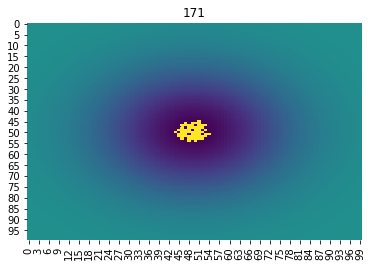

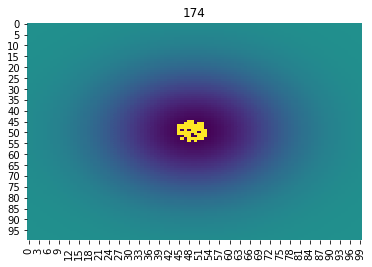

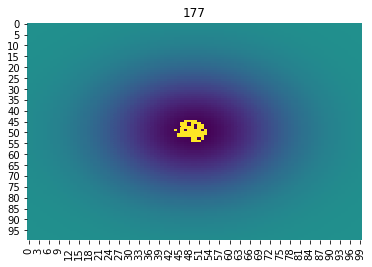

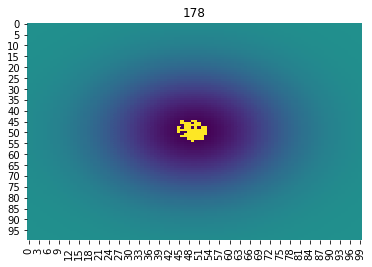

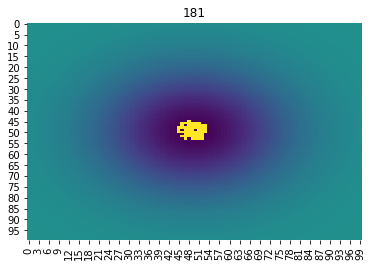

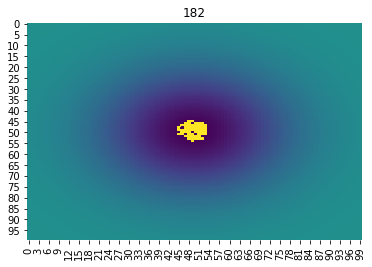

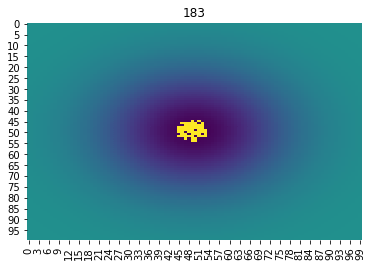

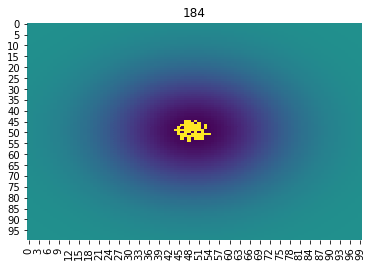

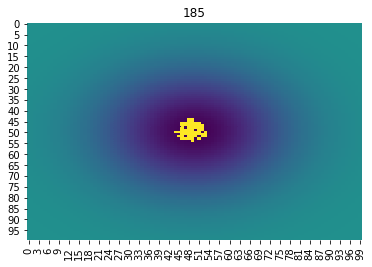

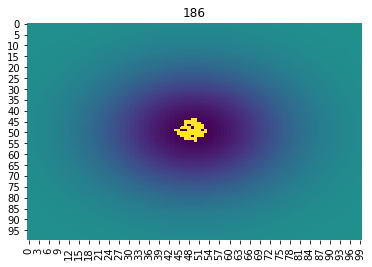

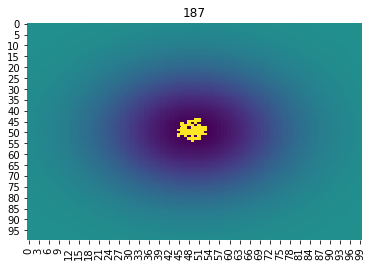

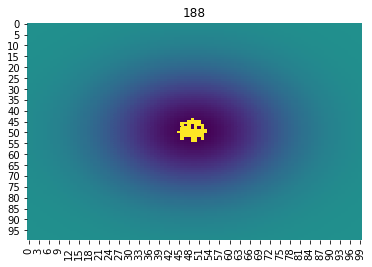

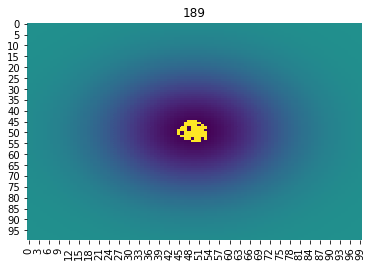

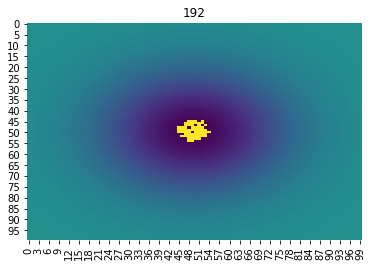

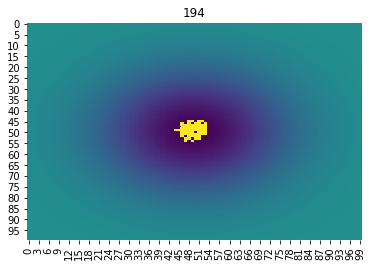

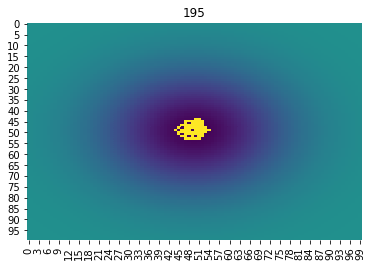

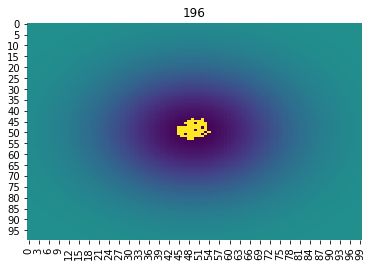

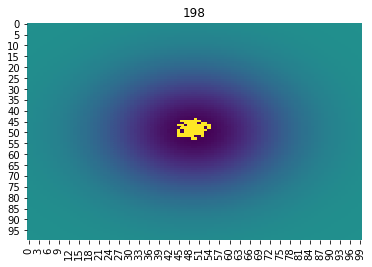

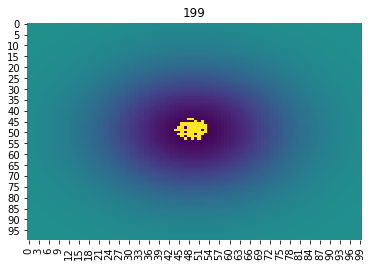

In [95]:

for frame in range(200): 
    
    #Update every agent position
    for ida,agent in enumerate(agents):
        
        #compute next agent pos.
        kernel=(slice(agent[0]-1,agent[0]+2,1),slice(agent[1]-1,agent[1]+2,1))
        #print(render[kernel])
        idx=np.argmin(render[kernel])
        #print(idx)
        (i,j)=np.unravel_index(idx, (3,3))
        #print(i,j)
        new_pos=(agent[0]+i-1,agent[1]+j-1)
        agents[ida]=new_pos
        
        render[agent]=life_map[agent]
        
        
        
        render[new_pos]=1
        
    fig, ax = plt.subplots()
    ax.set_title(frame)
    sns.heatmap(render,cmap='viridis',cbar=False,axes=ax)
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    images.append(image)
kwargs_write = {'fps':1.0, 'quantizer':'nq'}
imageio.mimsave('life.gif', images, fps=3)

In [98]:
imageio.mimsave('life.gif', images, fps=10)

### Show gif from simulation
![SegmentLocal](life.gif "segment")

In [60]:
a=[np.inf,10]
min(a)

10